<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Construcción de la base de datos
A partir de la documentación disponible sobre la prueba SaberPro 11 como la [documentación del examen](https://icfesgovco-my.sharepoint.com/personal/dataicfes_icfes_gov_co/_layouts/15/onedrive.aspx?ct=1589296771489&or=OWA%2DNT&cid=5cc96871%2D447f%2D0e87%2D9de5%2D3893e123b5ba&id=%2Fpersonal%2Fdataicfes%5Ficfes%5Fgov%5Fco%2FDocuments%2FDataIcfes%2F4%2E%20Saber11%2F2%2E%20Documentaci%C3%B3n%2F1%2E%20Saber11%2F1%2E%20Documentaci%C3%B3n%5FSaber11%2Epdf&parent=%2Fpersonal%2Fdataicfes%5Ficfes%5Fgov%5Fco%2FDocuments%2FDataIcfes%2F4%2E%20Saber11%2F2%2E%20Documentaci%C3%B3n%2F1%2E%20Saber11) y el [diccionario de variables](https://icfesgovco-my.sharepoint.com/personal/dataicfes_icfes_gov_co/_layouts/15/onedrive.aspx?ct=1589296771489&or=OWA%2DNT&cid=5cc96871%2D447f%2D0e87%2D9de5%2D3893e123b5ba&id=%2Fpersonal%2Fdataicfes%5Ficfes%5Fgov%5Fco%2FDocuments%2FDataIcfes%2F4%2E%20Saber11%2F2%2E%20Documentaci%C3%B3n%2F1%2E%20Saber11%2F2%2E%20Diccionarios%20Saber11%2FDiccionario%20Saber11%202019%2D1%20a%202020%2D2%2Epdf&parent=%2Fpersonal%2Fdataicfes%5Ficfes%5Fgov%5Fco%2FDocuments%2FDataIcfes%2F4%2E%20Saber11%2F2%2E%20Documentaci%C3%B3n%2F1%2E%20Saber11%2F2%2E%20Diccionarios%20Saber11) se definió trabajar con los periodos 2020-1 a 2021-1 (3) intiutivamente esperando tener hallazgos referente al calendario escolar del establecimiento al que pertenecen los estudiantes. A su vez, validando el contenido de las bases de datos y la definición de cada variable, se escogieron las siguientes para trabajar:

In [2]:
# Pre-selección de las variables de interés según descripción
variables_file = "./Archivos/Variables_ICFES.csv"
groups_variables = ['ESTU','FAMI','COLE','PUNT']

def initialize_variables(path):
    dicc = {}
    variables = pd.read_csv(path, header = 0, encoding='latin-1')
    variables.set_index('Variable', drop=True, inplace=True)
    variables = variables[(variables['Usarse'] == "Si")]
    dicc = variables['Nombre_Variable']
    return dicc

#Creacion del diccionario de variables
variables_dicc = initialize_variables(variables_file)

print("-----------------------------------------------------------------------------------")
print("Variables pre-seleccionadas:")
print("-----------------------------------------------------------------------------------")
print(variables_dicc)
print("\n")
print("Cant. de variables: " +str(variables_dicc.shape[0]))

-----------------------------------------------------------------------------------
Variables pre-seleccionadas:
-----------------------------------------------------------------------------------
Variable
ESTU_GENERO                                                                 Genero
ESTU_FECHANACIMIENTO                                              Fecha Nacimiento
ESTU_TIENEETNIA                                            Pertenece alguna etnia?
ESTU_DEPTO_RESIDE                                          Departamento residencia
FAMI_ESTRATOVIVIENDA                                            Estrato residencia
FAMI_TIENEINTERNET                                                 Tiene internet?
FAMI_TIENESERVICIOTV                                            Tiene servicio TV?
FAMI_TIENECOMPUTADOR                                             Tiene computador?
FAMI_TIENEAUTOMOVIL                                               Tiene automovil?
FAMI_COMELECHEDERIVADOS          ¿Cuantas veces

In [3]:
# Bases de datos seleccionadas
files = ["./Archivos/SB11_20201.txt","./Archivos/SB11_20202.txt", "./Archivos/SB11_20211.txt"]

def read_files_ICFES(path):
    df = pd.read_csv(path, sep="¬", header=0, keep_default_na=True, index_col=0,\
                     parse_dates=True, engine='python')
    return df

def calculate_age(series):
    dtoday = datetime.today()
    ages = []

    for birth in series:
        if np.isnan(birth.year):
            ages.append(birth)
        else:
            delta = dtoday.year - birth.year
            ages.append(delta)
    return ages
   
def initialize_database(files_path, dicc):  
    for i in range(len(files_path)):
        df_temp = read_files_ICFES(files_path[i])
        df_temp.set_index('ESTU_CONSECUTIVO', drop=True, inplace=True)
        df_temp = df_temp[list(dicc.index.values)]
        
        if i == 0:
            df = df_temp.copy()
        else:
            df = pd.concat([df, df_temp], axis=0, join= "inner")
    
    #Se quiere a partir de la fecha de nacimiento obtener la edad del estudiante
    df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'], errors = 'coerce')    
    df['ESTU_FECHANACIMIENTO'] = calculate_age(df['ESTU_FECHANACIMIENTO'])
    df = df.rename(columns = {'ESTU_FECHANACIMIENTO':'ESTU_EDAD'})  
    return df

#Cargue y consolidación de bases de datos para los periodos seleccionados
data_base = initialize_database(files, variables_dicc)
data_base_original = data_base.copy()

In [4]:
print("-----------------------------------------------------------------------------------")
print("Ejemplo registro base de datos:")
print("-----------------------------------------------------------------------------------")
print(data_base.head(2).transpose())
print("\n")
print("Cant. de registros: " +str(data_base.shape[0]))
print("Cant. de faltantes " +str(data_base.shape[0] - data_base.dropna().shape[0]))
print("Cant. de variables: " +str(len(data_base.columns)))

-----------------------------------------------------------------------------------
Ejemplo registro base de datos:
-----------------------------------------------------------------------------------
ESTU_CONSECUTIVO                          SB11202010045555 SB11202010045719
ESTU_GENERO                                              F                F
ESTU_EDAD                                               36               26
ESTU_TIENEETNIA                                         No               No
ESTU_DEPTO_RESIDE                                    CESAR           NARIÑO
FAMI_ESTRATOVIVIENDA                             Estrato 1              NaN
FAMI_TIENEINTERNET                                      No              NaN
FAMI_TIENESERVICIOTV                                    No              NaN
FAMI_TIENECOMPUTADOR                                    No              NaN
FAMI_TIENEAUTOMOVIL                                     No              NaN
FAMI_COMELECHEDERIVADOS             1 o 

## Exploración de la base de datos

In [5]:
#Metodo auxiliar para agrupar la base de datos por tipos de variables si se asocian al estudiante, la familia, entre otros
def sub_dataframe(df, group_var):
    new_df = pd.DataFrame()
    for var in df:
        if var.find(group_var) > -1 and var.find("Outlier") == -1:
            new_df[var] = df[var]
    return new_df

In [6]:
#Descriptivos por conjunto de variables
print("----------------------------------------------------------------------------------------------")
print("Se muestra el dato más frecuente para el grupo de variables del ESTUDIANTE:")
print("----------------------------------------------------------------------------------------------")
print(sub_dataframe(data_base,'ESTU').describe(include="all").loc["top"])

----------------------------------------------------------------------------------------------
Se muestra el dato más frecuente para el grupo de variables del ESTUDIANTE:
----------------------------------------------------------------------------------------------
ESTU_GENERO                     F
ESTU_EDAD                      18
ESTU_TIENEETNIA                No
ESTU_DEPTO_RESIDE          BOGOTÁ
ESTU_HORASSEMANATRABAJA         0
Name: top, dtype: object


En esta base de datos la mayoría de estudiantes que ha presentado el examen son mujeres, mientras que la edad representativa es de 18 años (que es lo esperado teniendo en cuenta que esta prueba se realiza a los estudiantes en su último año escolar), gran parte de ell@s reportaron no pertener a ninguna etnia y que no tienen un trabajo paralelo a sus estudios.

In [7]:
#Descriptivos por conjunto de variables
print("----------------------------------------------------------------------------------------------")
print("Se muestra el dato más frecuente para el grupo de variables relacionadas con la FAMILIA:")
print("----------------------------------------------------------------------------------------------")
print(sub_dataframe(data_base,'FAM').describe(include="all").loc["top"])

----------------------------------------------------------------------------------------------
Se muestra el dato más frecuente para el grupo de variables relacionadas con la FAMILIA:
----------------------------------------------------------------------------------------------
FAMI_ESTRATOVIVIENDA                               Estrato 2
FAMI_TIENEINTERNET                                        Si
FAMI_TIENESERVICIOTV                                      Si
FAMI_TIENECOMPUTADOR                                      Si
FAMI_TIENEAUTOMOVIL                                       No
FAMI_COMELECHEDERIVADOS               1 o 2 veces por semana
FAMI_COMECARNEPESCADOHUEVO       Todos o casi todos los días
FAMI_COMECEREALFRUTOSLEGUMBRE         1 o 2 veces por semana
Name: top, dtype: object


En cuanto a las variables relacionadas con la familia o modo de vivir, la mayor cantidad de estudiantes que presentaron la prueba durante estos periodos vive en residencia de Estrato 2, tienen acceso a Internet y Servicio de TV, poseen en su casa un Computador pero no tienen Automovil. En cuanto a sus habitos de alimentación consumen al menos 1 o 2 veces por semana leche y sus derivados, además de frutas, cereales y legumbres, y en cuanto a las proteinas en general consumen casi todos los días.

In [8]:
#Descriptivos por conjunto de variables
print("----------------------------------------------------------------------------------------------------------")
print("Se muestra el dato más frecuente para el grupo de variables relacionadas con el ESTABLECIMIENTO educativo:")
print("----------------------------------------------------------------------------------------------------------")
print(sub_dataframe(data_base,'COLE').describe(include="all").loc["top"])

----------------------------------------------------------------------------------------------------------
Se muestra el dato más frecuente para el grupo de variables relacionadas con el ESTABLECIMIENTO educativo:
----------------------------------------------------------------------------------------------------------
COLE_GENERO            MIXTO
COLE_CALENDARIO            A
COLE_BILINGUE              N
COLE_CARACTER      ACADÉMICO
Name: top, dtype: object


Respecto al esteblecimiento educativo se observa que la mayor cantidad de estudiantes que presentaron la prueba pertenecen a planteles de calendario A, mixtos, no bilingues y de caracter académico. Gran parte de esto es explicado porque se incluyó la base de datos del 2020-2 donde mayor parte de los estudiantes que presentan la prueba pertencen al calendario A.

In [9]:
#Descriptivos por conjunto de variables
df_scores = sub_dataframe(data_base,'PUNT')
print("----------------------------------------------------------------------------------------------------------")
print("Se muestra el conjunto de estadísticas descriptivas para el puntaje global de la prueba:")
print("----------------------------------------------------------------------------------------------------------")
print(round(df_scores.describe().iloc[1:],0).transpose())

----------------------------------------------------------------------------------------------------------
Se muestra el conjunto de estadísticas descriptivas para el puntaje global de la prueba:
----------------------------------------------------------------------------------------------------------
                           mean   std  min    25%    50%    75%    max
PUNT_LECTURA_CRITICA       53.0  10.0  0.0   45.0   53.0   60.0  100.0
PUNT_MATEMATICAS           52.0  12.0  0.0   43.0   51.0   60.0  100.0
PUNT_C_NATURALES           49.0  11.0  0.0   41.0   48.0   56.0  100.0
PUNT_SOCIALES_CIUDADANAS   49.0  12.0  0.0   39.0   48.0   58.0  100.0
PUNT_INGLES                48.0  13.0  0.0   39.0   46.0   53.0  100.0
PUNT_GLOBAL               251.0  51.0  0.0  212.0  247.0  286.0  500.0


<AxesSubplot:>

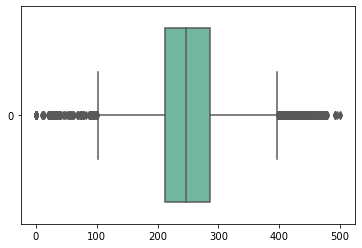

In [10]:
sns.boxplot(data=df_scores["PUNT_GLOBAL"], orient="h", palette="Set2")

<AxesSubplot:xlabel='variable', ylabel='value'>

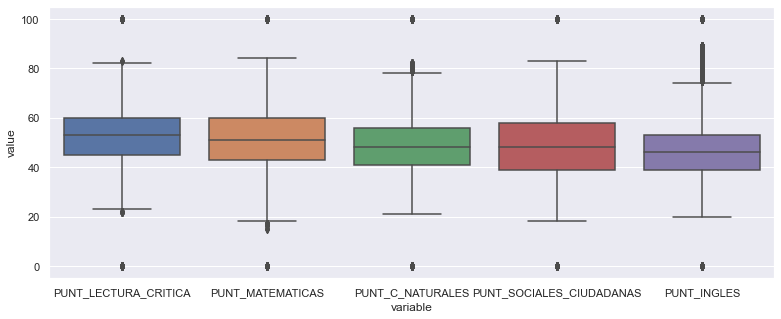

In [11]:
df_scores_ind = pd.melt(df_scores.iloc[:,0:5],value_vars=df_scores.iloc[:,0:5].columns)
sns.set(rc={"figure.figsize":(13, 5)})
sns.boxplot(x="variable", y="value", data=df_scores_ind)

En los periodos seleccionados los estudiantes tuvieron un promedio de puntaje global de 251 de 500 puntos totales posibles, que fundamenta el proposito de este análisis. En general se observa que todas las pruebas individuales presentan resultados similares alcanzando a penas el 50% de los puntos posibles. 

## Identificación y manejo de datos faltantes

A continuación se muestra la cantidad de datos faltantes que tenemos en la base de datos actual:

In [12]:
def report_missing_val(df):
    total_reg = len(data_base)
    faltantes_tot = df.shape[0] - df.dropna().shape[0]
    por_faltantes = round(faltantes_tot/total_reg*100,2)

    miss_Val = pd.DataFrame(df.isna().sum())
    miss_Val['Prop% vs Total'] =round(miss_Val[0]/total_reg,3)
    miss_Val['Menor al 5%'] = np.where(miss_Val['Prop% vs Total']<0.05, "Si", "No")
    miss_Val = miss_Val.rename(columns = {0:'Cant. faltantes'})
    print("----------------------------------------------------------------------------------------------------------")
    print("Reporte faltantes")
    print("----------------------------------------------------------------------------------------------------------")
    print(miss_Val)
    print("Total registros con al menos un faltante: " +str(faltantes_tot))    
    print("Total registros: " +str(total_reg))
    print("%registros a eliminar: " +str(por_faltantes)+"%")

report_missing_val(data_base)

----------------------------------------------------------------------------------------------------------
Reporte faltantes
----------------------------------------------------------------------------------------------------------
                               Cant. faltantes  Prop% vs Total Menor al 5%
ESTU_GENERO                                 14           0.000          Si
ESTU_EDAD                                 5157           0.010          Si
ESTU_TIENEETNIA                           5448           0.010          Si
ESTU_DEPTO_RESIDE                          774           0.001          Si
FAMI_ESTRATOVIVIENDA                     19266           0.036          Si
FAMI_TIENEINTERNET                       15874           0.030          Si
FAMI_TIENESERVICIOTV                     17677           0.033          Si
FAMI_TIENECOMPUTADOR                     22142           0.041          Si
FAMI_TIENEAUTOMOVIL                      19814           0.037          Si
FAMI_COMELECHEDERI

Si bien la cantidad de datos faltantes por variable en la mayoría de casos no supera el 5% (calculado en base a los 538mil registros), la cantidad de registros con al menos un faltante es alta: 24.6% del total de la base de datos. 

Por esto, se propone una validación de las variables más significativas para explicar el puntaje global. En primera instancia, se evaluará la multicolinealidad para eliminar aquellas que expliquen la misma variabilidad en la variable del puntaje global. 

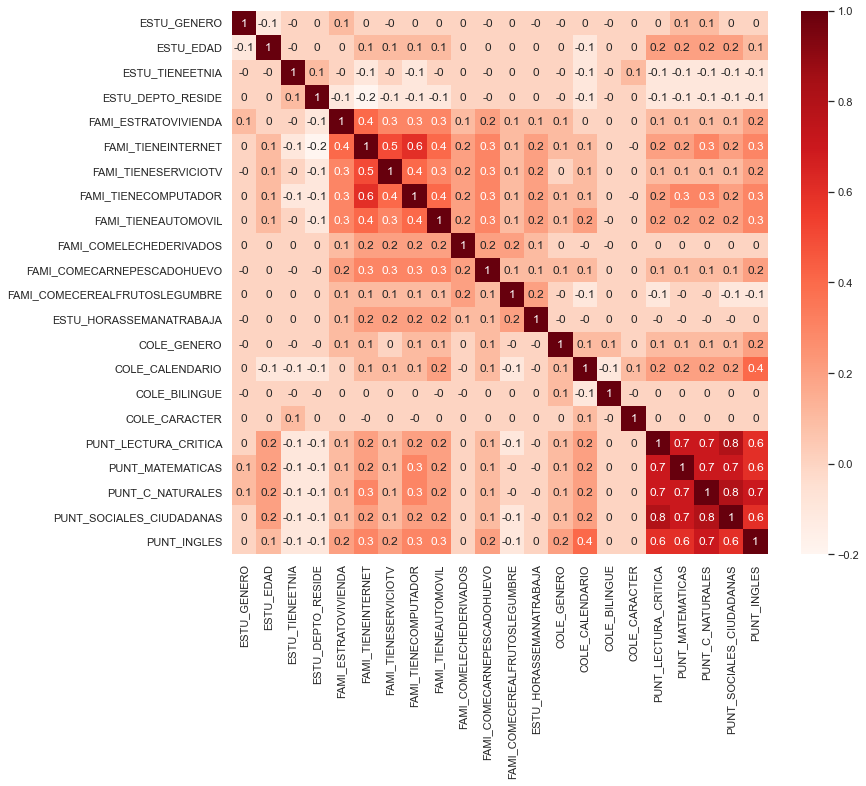

In [13]:
#Función para factorizar las variables categoricas
def factorize_variables(df):
    class_type = df.columns.to_series().groupby(df.dtypes).groups
    ctext = class_type[np.dtype('object')]
    for c in ctext:
        df[c], _ = pd.factorize(df[c])
    return df

#Validación de presencia de multicolinealidad en los datos
def correlated_x(df, y_name):
    #By default corr higher than 0.5 will be eliminate
    df = factorize_variables(df)
    df_X = df.loc[:, df.columns != y_name] 
    
    plt.figure(figsize=(12,10))
    cor = df_X.corr()
    sns.heatmap(round(cor,1), annot=True, cmap=plt.cm.Reds)
    plt.show()
    
    features_highcorr = []
    cor = abs(cor)
    for feature in cor:
        ind = cor.index
        for i in ind:
            val = cor.loc[i,feature]
            if val >= 0.5 and val < 1 and feature not in features_highcorr:
                features_highcorr.append(i)
                cor.loc[feature,i] = np.nan
    return features_highcorr 

#Eliminar variables que presentan multicolinalidad
data_base.drop(correlated_x(data_base.copy(),'PUNT_GLOBAL'),axis=1, inplace=True)

In [14]:
report_missing_val(data_base)

----------------------------------------------------------------------------------------------------------
Reporte faltantes
----------------------------------------------------------------------------------------------------------
                               Cant. faltantes  Prop% vs Total Menor al 5%
ESTU_GENERO                                 14           0.000          Si
ESTU_EDAD                                 5157           0.010          Si
ESTU_TIENEETNIA                           5448           0.010          Si
ESTU_DEPTO_RESIDE                          774           0.001          Si
FAMI_ESTRATOVIVIENDA                     19266           0.036          Si
FAMI_TIENEINTERNET                       15874           0.030          Si
FAMI_TIENEAUTOMOVIL                      19814           0.037          Si
FAMI_COMELECHEDERIVADOS                  16052           0.030          Si
FAMI_COMECARNEPESCADOHUEVO               17540           0.033          Si
FAMI_COMECEREALFRU

Con el analisis para cada par de variables altamente correlacionadas (se paso como parametro mayor a 0.05) se dejo solamente una de ellas ya que se asume ambas explicarán la misma variabilidad en el puntaje global. Como resultado se eliminaron las variables "Tiene servicio de TV?" y "Tiene computador?" que tenian una correlación alta con "Tiene internert?" y se mantuvo solo uno de los puntajes. La selección de la variable que se mantiene fue arbitraria, se mantuvo la primera encontrada. 

Todavía el porcentaje de registros a eliminar es alto de 23.5%. Para manejar esto se propone concentrarse en las variables que tienen una relación alta con el PUNT_GLOBAL - si cerrando las variables el porcentaje a eliminar es menor al 10% se procede a eliminar esos registros.  

----------------------------------------------------------------------------------------------------------
Matriz de correlación incluido PUNT_GLOBAL
----------------------------------------------------------------------------------------------------------


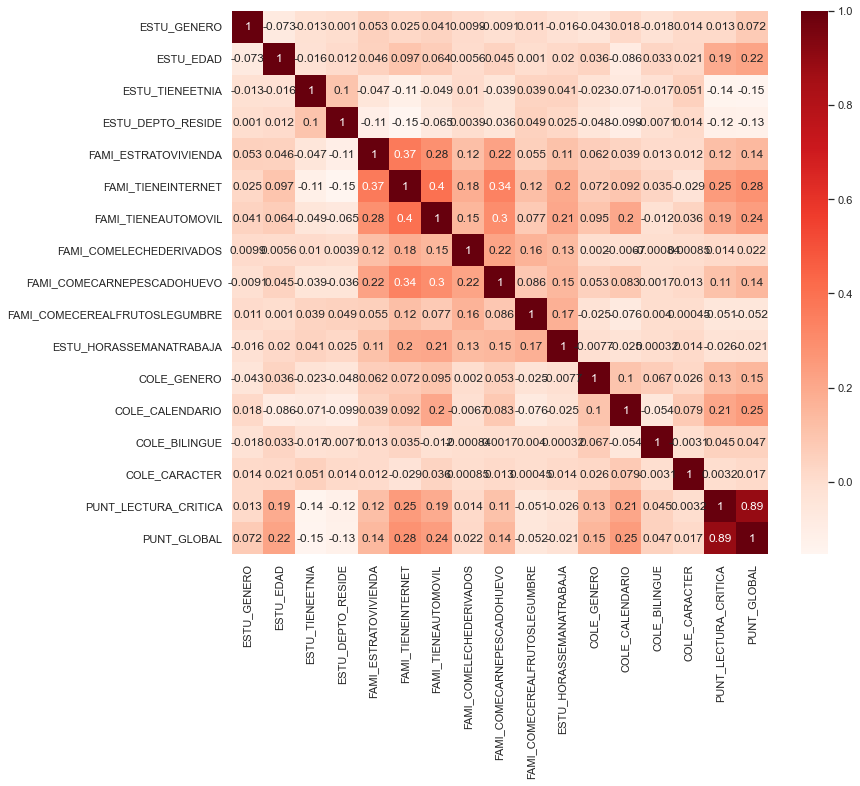

----------------------------------------------------------------------------------------------------------
Nuevas dimensiones de la base de datos:
----------------------------------------------------------------------------------------------------------
Cant. de variables: 17
Cant. de registros: 498397
Cant. de eliminados: -37438
Cant. de faltantes 88607


In [15]:
def validate_missing_val(df):
    total_reg = len(data_base)
    faltantes_tot = df.shape[0] - df.dropna().shape[0]
    por_faltantes = round(faltantes_tot/total_reg*100,2)
        
    if por_faltantes > 10:
        remove_yn = False
    else:
        remove_yn = True
    return remove_yn

def index_tobe_remove(df):
    index_drop = -1
    if validate_missing_val(df):    
        index_drop = df.dropna().index
    return index_drop

def filter_method(df,top_num):
    df = factorize_variables(df)
    df.dropna(inplace=True)
    
    print("----------------------------------------------------------------------------------------------------------")
    print("Matriz de correlación incluido PUNT_GLOBAL")
    print("----------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    #Correlation with Global Score results
    cor_target = abs(cor["PUNT_GLOBAL"])
    #Selecting top 5 correlated features to Global Score
    sorted(cor_target)
    relevant_features = cor_target.nlargest(n=top_num+1)
    
    return relevant_features

if index_tobe_remove(data_base.copy()) == -1:  
    #Eliminar registros en caracteristicas con alto indice corr vs PUNT GLOBAL
    #Ya que imputar datos en este punto podria cambiar el resultado del analisis 
    highcorr_features = filter_method(data_base.copy(),10)
    data_highcorr = data_base.copy()
    data_highcorr = data_highcorr[highcorr_features.index]
    list_indx = index_tobe_remove(data_highcorr)

reg_before = data_base.shape[0]
data_base = data_base.loc[list_indx]

print("----------------------------------------------------------------------------------------------------------")
print("Nuevas dimensiones de la base de datos:")
print("----------------------------------------------------------------------------------------------------------")
print("Cant. de variables: " +str(data_base.shape[1]))
print("Cant. de registros: " +str(data_base.shape[0]))
print("Cant. de eliminados: " +str(len(data_base)-reg_before))
print("Cant. de faltantes " +str(data_base.shape[0] - data_base.dropna().shape[0]))

Con esta aproximación se eliminaron 37.438 registros (6.98% del total de registros iniciales) - contenian al menos un faltante de las variables más correlacionadas con el puntaje global. Los datos faltantes restantes (88.607) se proceden a imputar utilizando el valor más frecuente para las variables categoricas principalmente:

In [16]:
#Mostrar variables con faltantes y tipo de variable
ref_tofill = pd.DataFrame(data_base.isna().sum())
ref_tofill = ref_tofill.rename(columns = {0:'Cant. faltantes'})
ref_tofill = pd.concat(([ref_tofill,pd.DataFrame(data_base.dtypes)]), axis=1)
ref_tofill = ref_tofill.rename(columns = {0:'Tipo'})
print("----------------------------------------------------------------------------------------------------------")
print("Variables con faltantes a imputar (tienen el menor grado de correlacción con PUNT_GLOBAL):")
print("----------------------------------------------------------------------------------------------------------")
print(ref_tofill[(ref_tofill['Cant. faltantes'] > 0)])

----------------------------------------------------------------------------------------------------------
Variables con faltantes a imputar (tienen el menor grado de correlacción con PUNT_GLOBAL):
----------------------------------------------------------------------------------------------------------
                               Cant. faltantes    Tipo
ESTU_GENERO                                  1  object
FAMI_COMELECHEDERIVADOS                    522  object
FAMI_COMECEREALFRUTOSLEGUMBRE             5814  object
ESTU_HORASSEMANATRABAJA                   1919  object
COLE_BILINGUE                            81212  object
COLE_CARACTER                            13535  object


In [17]:
#Completar faltantes usando modas para variables categoricas
for var in ref_tofill.index:
    if ref_tofill.loc[var,'Cant. faltantes'] > 0:
        if ref_tofill.loc[var,'Tipo'] == 'object':    
            data_base[var] = data_base[var].fillna(data_base[var].mode()[0])
        else:
            data_base.fillna(data_base.median())

report_missing_val(data_base)

----------------------------------------------------------------------------------------------------------
Reporte faltantes
----------------------------------------------------------------------------------------------------------
                               Cant. faltantes  Prop% vs Total Menor al 5%
ESTU_GENERO                                  0             0.0          Si
ESTU_EDAD                                    0             0.0          Si
ESTU_TIENEETNIA                              0             0.0          Si
ESTU_DEPTO_RESIDE                            0             0.0          Si
FAMI_ESTRATOVIVIENDA                         0             0.0          Si
FAMI_TIENEINTERNET                           0             0.0          Si
FAMI_TIENEAUTOMOVIL                          0             0.0          Si
FAMI_COMELECHEDERIVADOS                      0             0.0          Si
FAMI_COMECARNEPESCADOHUEVO                   0             0.0          Si
FAMI_COMECEREALFRU

Con la imputación realizada el reporte muestra que no hay más datos faltantes dentro de nuestras columnas de interés. 
Adicional se debe hacer un ajuste a la variable edad (creada a partir de la fecha de nacimiento) para que se trabaje como tipo númerica. 

In [18]:
data_base["ESTU_EDAD"] = pd.to_numeric(data_base["ESTU_EDAD"])
data_base["ESTU_EDAD"].dtypes

dtype('int64')

Por ultimo, como se menciona en la documentación de la prueba el PUNT_GLOBAL es el resultado de los puntajes obtenidos en las distintas pruebas individuales, por esto se elimina el PUNT_LECTURA_CRITICA de la base de datos, para concentrar los esfuerzos sobre variables de intéres que respondan a la problemática planteada.

In [19]:
data_base.drop('PUNT_LECTURA_CRITICA',axis=1,inplace=True)

## Identificación y manejo de outliers

In [20]:
def identify_outlier_IQR(df):
    df = factorize_variables(df.copy())
    for val in df:
        Q1 = df[val].quantile(0.25)
        Q3 = df[val].quantile(0.75)
        IQR = Q3 - Q1

        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        col_name = 'Outlier_' + val
        df[col_name] = np.where(df[val]>upper_limit, 1, 0)
        df[col_name] = np.where(df[val]<lower_limit, 1, 0)
        
        if df[col_name].sum() > 0:
            print(col_name +": " +str(df[col_name].sum()))
    return df

print("----------------------------------------------------------------------------------------------------------")
print("Cantidad de registros atipicos por variable basado en IQR:")
print("----------------------------------------------------------------------------------------------------------")
df_wOutliers = identify_outlier_IQR(data_base.copy())

----------------------------------------------------------------------------------------------------------
Cantidad de registros atipicos por variable basado en IQR:
----------------------------------------------------------------------------------------------------------
Outlier_ESTU_EDAD: 5340
Outlier_ESTU_HORASSEMANATRABAJA: 76938
Outlier_COLE_BILINGUE: 10112
Outlier_PUNT_GLOBAL: 7


<AxesSubplot:xlabel='COLE_BILINGUE', ylabel='PUNT_GLOBAL'>

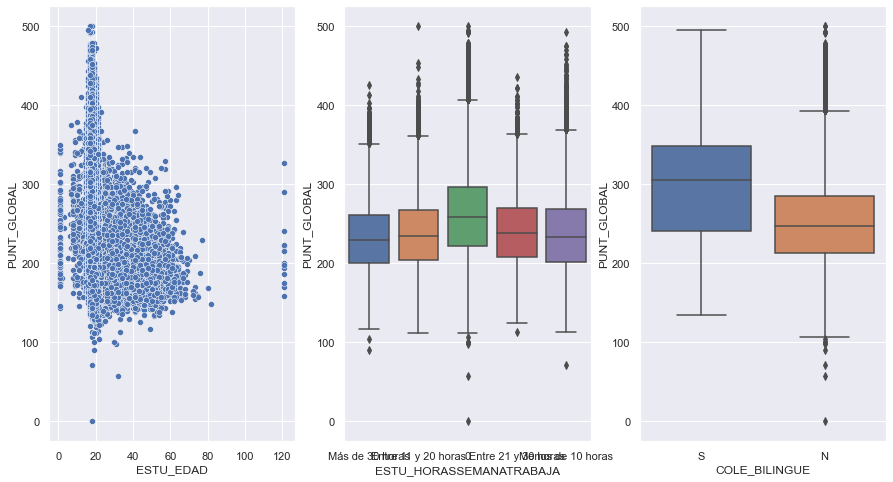

In [21]:
fig, axs = plt.subplots(ncols=3,figsize=(15,8))
sns.scatterplot(x='ESTU_EDAD', y='PUNT_GLOBAL', data=data_base, ax=axs[0])
sns.boxplot(x='ESTU_HORASSEMANATRABAJA', y='PUNT_GLOBAL', data=data_base, ax=axs[1])
sns.boxplot(x='COLE_BILINGUE',y='PUNT_GLOBAL', data=data_base, ax=axs[2])

Considerando el análisis de outliers realizado se determina eliminar todos los outliers para la variable Edad. Visualmente se puede observar que hay edades bastante lejanas (atipicas) que no son coherentes con la tendencia de esta variable. En cuanto a las horas de semanas trabajadas se decide re-organizar la variable para concentrar el analisis si el estudiante trabaja o no. 

In [22]:
#Union de dataframes entre la base original y los outliers
cols_to_use = df_wOutliers.columns.difference(data_base.columns)
data_base = pd.merge(data_base, df_wOutliers[cols_to_use], right_index=True, left_index=True)

In [23]:
#Eliminar datos atipicos para la variable fecha
data_base = data_base.drop(data_base[data_base['Outlier_ESTU_EDAD'] == 1].index)

In [24]:
#Agrupar valores en la variable HORAS SEMANA TRABAJA
data_base['ESTU_HORASSEMANATRABAJA'] = np.where(data_base['ESTU_HORASSEMANATRABAJA'] == '0', 'No', 'Si')

In [25]:
print("----------------------------------------------------------------------------------------------------------")
print("Cantidad de registros atipicos por variable basado en IQR:")
print("----------------------------------------------------------------------------------------------------------")
df_wOutliers = identify_outlier_IQR(data_base.copy())

----------------------------------------------------------------------------------------------------------
Cantidad de registros atipicos por variable basado en IQR:
----------------------------------------------------------------------------------------------------------
Outlier_COLE_BILINGUE: 10006
Outlier_PUNT_GLOBAL: 8


<AxesSubplot:xlabel='COLE_BILINGUE', ylabel='PUNT_GLOBAL'>

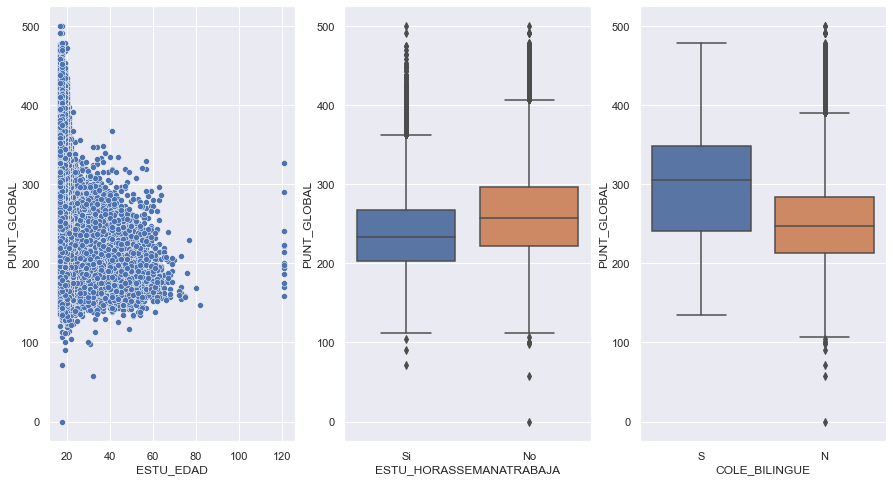

In [26]:
fig, axs = plt.subplots(ncols=3,figsize=(15,8))
sns.scatterplot(x='ESTU_EDAD', y='PUNT_GLOBAL', data=data_base, ax=axs[0])
sns.boxplot(x='ESTU_HORASSEMANATRABAJA', y='PUNT_GLOBAL', data=data_base, ax=axs[1])
sns.boxplot(x='COLE_BILINGUE',y='PUNT_GLOBAL', data=data_base, ax=axs[2])

Con este resultado vemos como la variable HORAS DE TRABAJO ya no presenta datos atipicos con el ajuste realizado. Para la variable SI COLEGIO ES BILINGUE mantenemos los datos atipicos encontrados ya que no hay soporte para eliminarlos.

## Consolidación base de datos

In [27]:
print("----------------------------------------------------------------------------------------------------------")
print("Nuevas dimensiones de la base de datos:")
print("\n")
print("Cant. de variables: " +str(int(data_base.shape[1]/2)))
print("Cant. de registros: " +str(data_base.shape[0]))
print("----------------------------------------------------------------------------------------------------------")
for val in groups_variables:
    print("Grupo: "+val)
    print("Variables finales:")
    print(sub_dataframe(data_base,val).columns)
    print("----------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------
Nuevas dimensiones de la base de datos:


Cant. de variables: 16
Cant. de registros: 493057
----------------------------------------------------------------------------------------------------------
Grupo: ESTU
Variables finales:
Index(['ESTU_GENERO', 'ESTU_EDAD', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_HORASSEMANATRABAJA'],
      dtype='object')
----------------------------------------------------------------------------------------------------------
Grupo: FAMI
Variables finales:
Index(['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE'],
      dtype='object')
----------------------------------------------------------------------------------------------------------
Grupo: COLE
Variables finales:
Index(['COLE_GENERO', 'COLE_CALENDARIO', 'COLE_BILIN

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [28]:
df_COLE = sub_dataframe(data_base,'COLE').join(data_base['PUNT_GLOBAL'], how='inner')
df_ESTU = sub_dataframe(data_base,'ESTU').join(data_base['PUNT_GLOBAL'], how='inner')
df_FAMI = sub_dataframe(data_base,'FAMI').join(data_base['PUNT_GLOBAL'], how='inner')

## Exploración por grupo de variables frente a los resultados del puntaje global

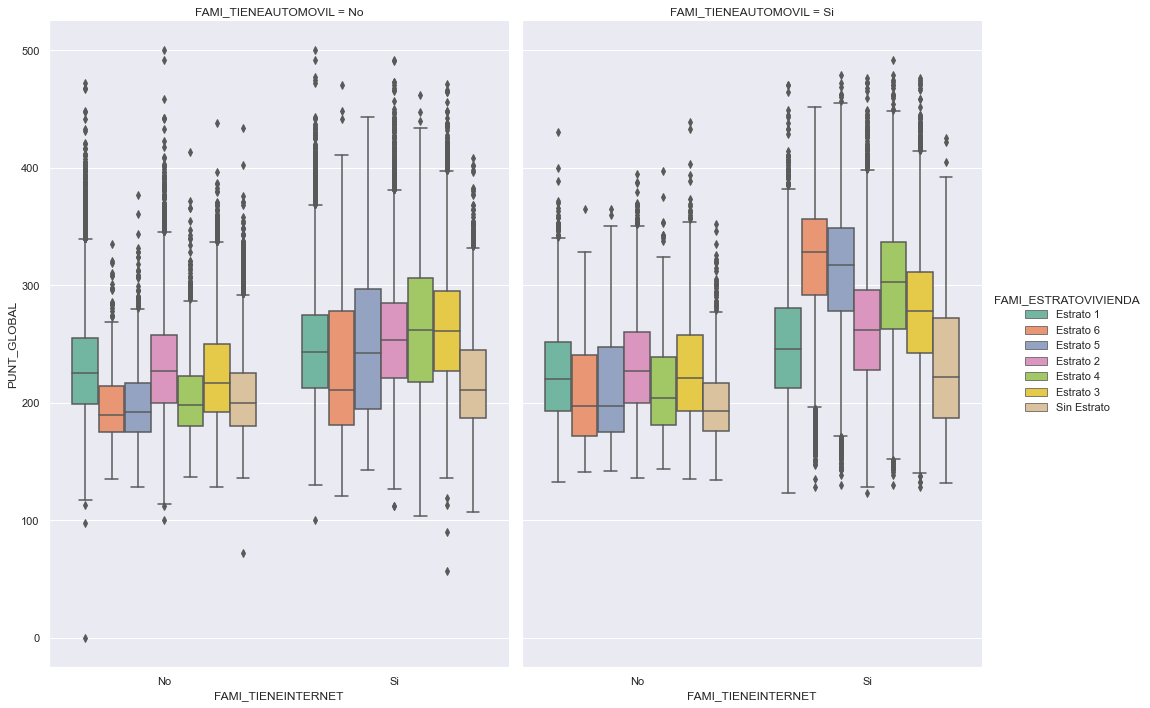

In [29]:
sns.catplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL",hue="FAMI_ESTRATOVIVIENDA", col="FAMI_TIENEAUTOMOVIL",data=df_FAMI, 
                kind="box",height=10, aspect=.7, palette="Set2");

Referente al grupo de variables familiares (FAMI) se pueden observar que el puntaje global es significativamente más alto para los estudiantes que cuentan con conexión a internet en su casa. Asimismo, se puede pensar que tener el tener automovil tiene inferencia en los resultados. Ambas variables pueden engloblar una condición de bienestar economico que soporta la dedicación de la persona a su estudio. Por último, el Estrato puede influir de cierta manera por la fluctuación que se denota en las cajas arriba - sin embargo el efecto especifico aún no se puede determinar. 

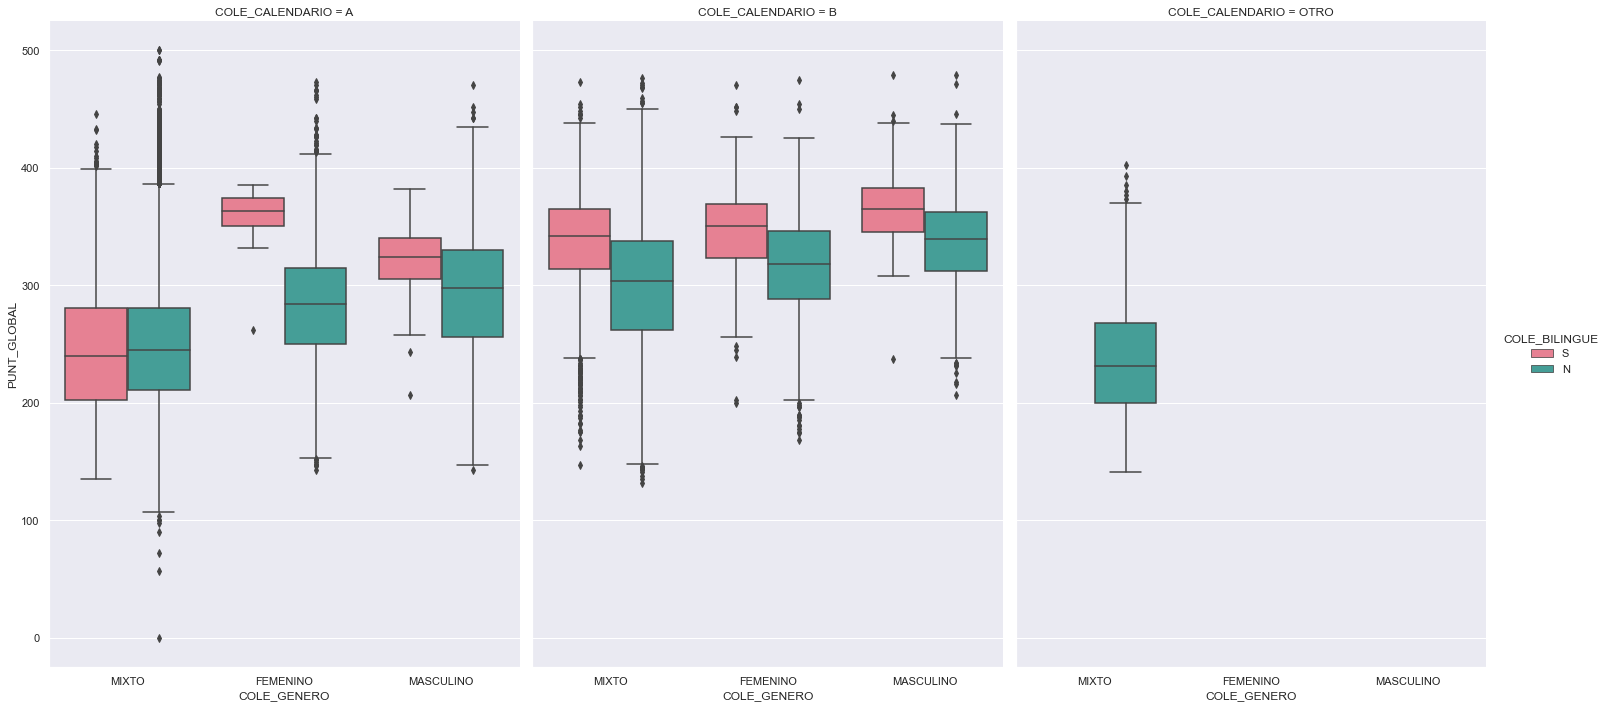

In [30]:
sns.catplot(x="COLE_GENERO", y="PUNT_GLOBAL",hue="COLE_BILINGUE", col="COLE_CALENDARIO",data=df_COLE, 
                kind="box",height=10, aspect=.7, palette="husl");

Es más evidente en el conjunto de variables que describen al establecimeinto como el ser bilingue y pertener al calendario B directamente están relacionadas con un buen desempeño en las pruebas. Por si lado si el establecimiento es Femenino, Mixto o Masculino no tiene mayor injerencia sobre los puntajes obtenidos. 

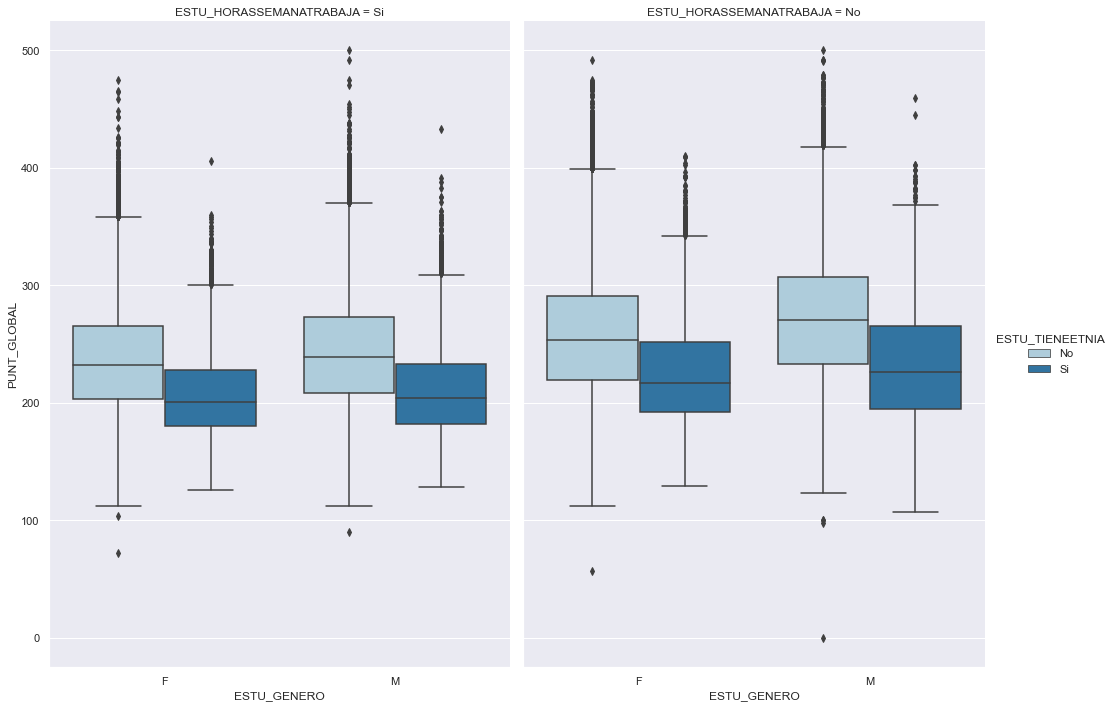

In [31]:
sns.catplot(x="ESTU_GENERO", y="PUNT_GLOBAL",hue="ESTU_TIENEETNIA", col="ESTU_HORASSEMANATRABAJA",data=df_ESTU, 
                kind="box",height=10, aspect=.7,palette="Paired");

En cuanto a las variables que caracteriza al estudiante: el no pertener a una etnia y no encontrarse trabajando, muestra relación directa con un buen desempeño en el la prueba. Por su parte, el genero del estudiante no tiene inherencia sobre los resultados de la prueba.   

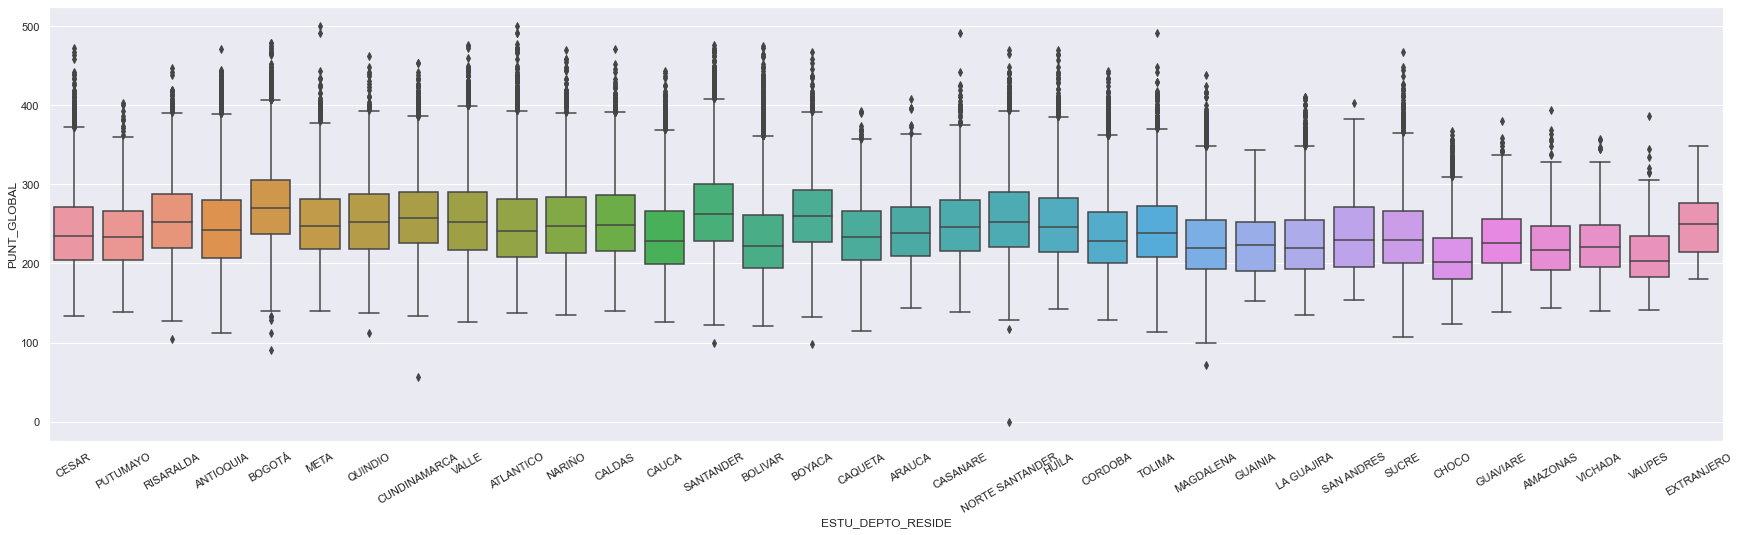

In [32]:
sns.set(rc={"figure.figsize":(30, 8)})
ax = sns.boxplot(x="ESTU_DEPTO_RESIDE", y="PUNT_GLOBAL", data=df_ESTU)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

El departamento donde reside el estudiante al parecer no es significativo "globalmente" para el puntaje obtenido en la prueba. De la gráfica ciertos casos se pueden resaltar cómo es el caso de Bogotá, que levemente tiene mejores resultados en la prueba. Las conclusiones sobre esta variable van a estar sesgadas por la cantidad de registros obtenidos de cada departamento, el más bajo tiene 19 registros mientras que Bogotá tiene 78K. 

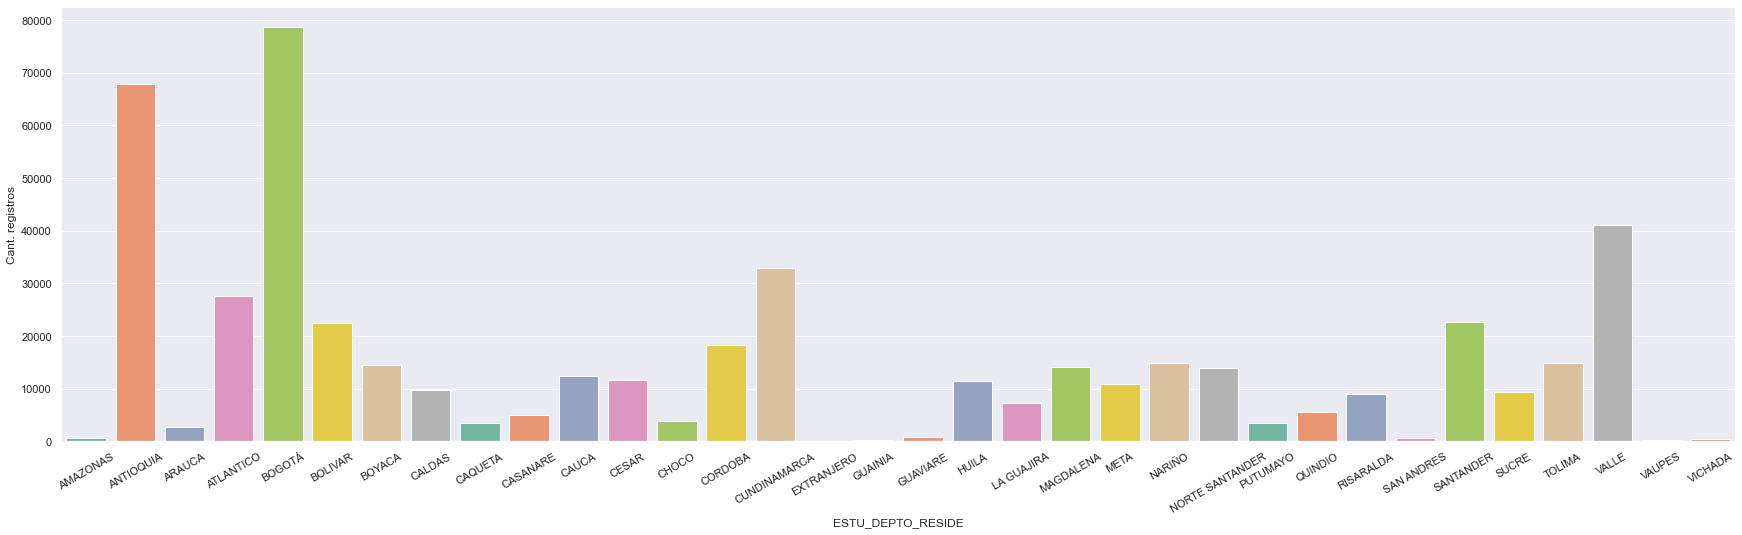

                    mean      std   min     25%      50%      75%      max
Cant. registros  14502.0  17875.0  19.0  3464.0  10328.0  14870.0  78640.0


In [33]:
count_dept = pd.DataFrame(data_base.groupby(['ESTU_DEPTO_RESIDE']).count().iloc[:,0])
count_dept = count_dept.rename(columns = {'ESTU_GENERO':'Cant. registros'})
count_dept.sort_values(by ='Cant. registros', ascending = False)

sns.set(rc={"figure.figsize":(30, 8)})
ax = sns.barplot(x=count_dept.index, y='Cant. registros', data=count_dept, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()
print(round(count_dept.describe(),0).iloc[1:].transpose())

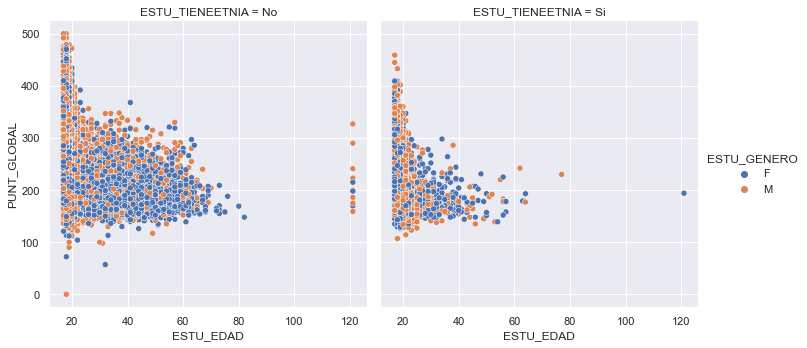

In [34]:
sns.relplot(x="ESTU_EDAD", y="PUNT_GLOBAL", hue="ESTU_GENERO", col="ESTU_TIENEETNIA", data=df_ESTU);

Por ultimo se tiene la edad que ya habiamos estudidado precviamente - se siguen observando los datos átipicos para este campo y particularmente no se denotan diferencias sustanciales en el puntaje global dada la edad y el genero - algo que si lo marca diferente es la etnia, previamente analizada. 

## Análisis variables vs Puntaje Global

In [35]:
data_base_fact = factorize_variables(data_base.copy()).iloc[:,0:16]

----------------------------------------------------------------------------------------------------------
Matriz de correlación incluido PUNT_GLOBAL
----------------------------------------------------------------------------------------------------------


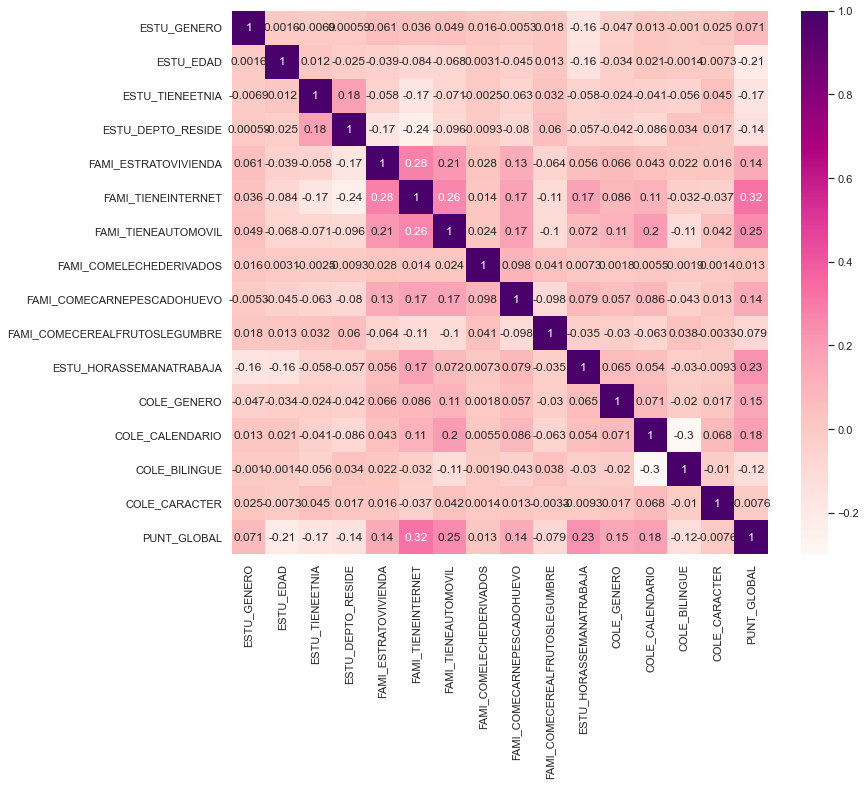

----------------------------------------------------------------------------------------------------------
Top 5 correlaciones vs PUNT_GLOBAL
----------------------------------------------------------------------------------------------------------
PUNT_GLOBAL                1.000000
FAMI_TIENEINTERNET         0.315111
FAMI_TIENEAUTOMOVIL        0.246456
ESTU_HORASSEMANATRABAJA    0.226722
ESTU_EDAD                  0.210476
COLE_CALENDARIO            0.184482
ESTU_TIENEETNIA            0.165547
Name: PUNT_GLOBAL, dtype: float64


In [36]:
print("----------------------------------------------------------------------------------------------------------")
print("Matriz de correlación incluido PUNT_GLOBAL")
print("----------------------------------------------------------------------------------------------------------")
plt.figure(figsize=(12,10))
cor_pt2 = data_base_fact.corr()
sns.heatmap(cor_pt2, annot=True, cmap=plt.cm.RdPu)
plt.show()

print("----------------------------------------------------------------------------------------------------------")
print("Top 5 correlaciones vs PUNT_GLOBAL")
print("----------------------------------------------------------------------------------------------------------")
print(abs(cor_pt2['PUNT_GLOBAL']).nlargest(n=7))

In [37]:
top5corr = abs(cor_pt2['PUNT_GLOBAL']).nlargest(n=7).index
top5corr

Index(['PUNT_GLOBAL', 'FAMI_TIENEINTERNET', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_EDAD', 'COLE_CALENDARIO',
       'ESTU_TIENEETNIA'],
      dtype='object')

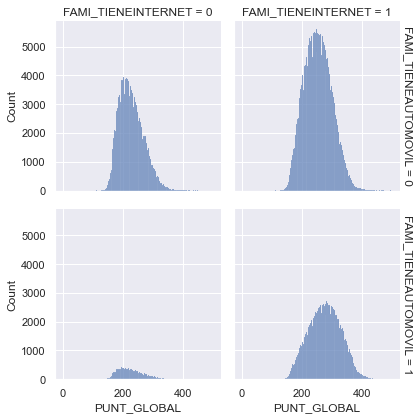

In [38]:
sns.set_theme(style="darkgrid")
sns.displot(
    data_base_fact[top5corr], x="PUNT_GLOBAL", col="FAMI_TIENEINTERNET", row="FAMI_TIENEAUTOMOVIL",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

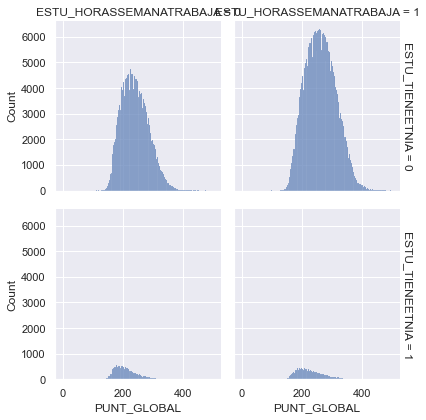

In [39]:
sns.set_theme(style="darkgrid")
sns.displot(
    data_base_fact[top5corr], x="PUNT_GLOBAL", col="ESTU_HORASSEMANATRABAJA", row="ESTU_TIENEETNIA",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

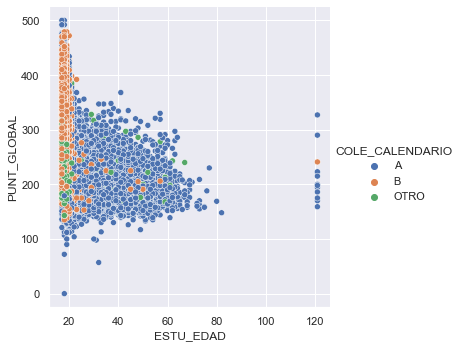

In [40]:
sns.relplot(x="ESTU_EDAD", y="PUNT_GLOBAL", hue="COLE_CALENDARIO", data=data_base);

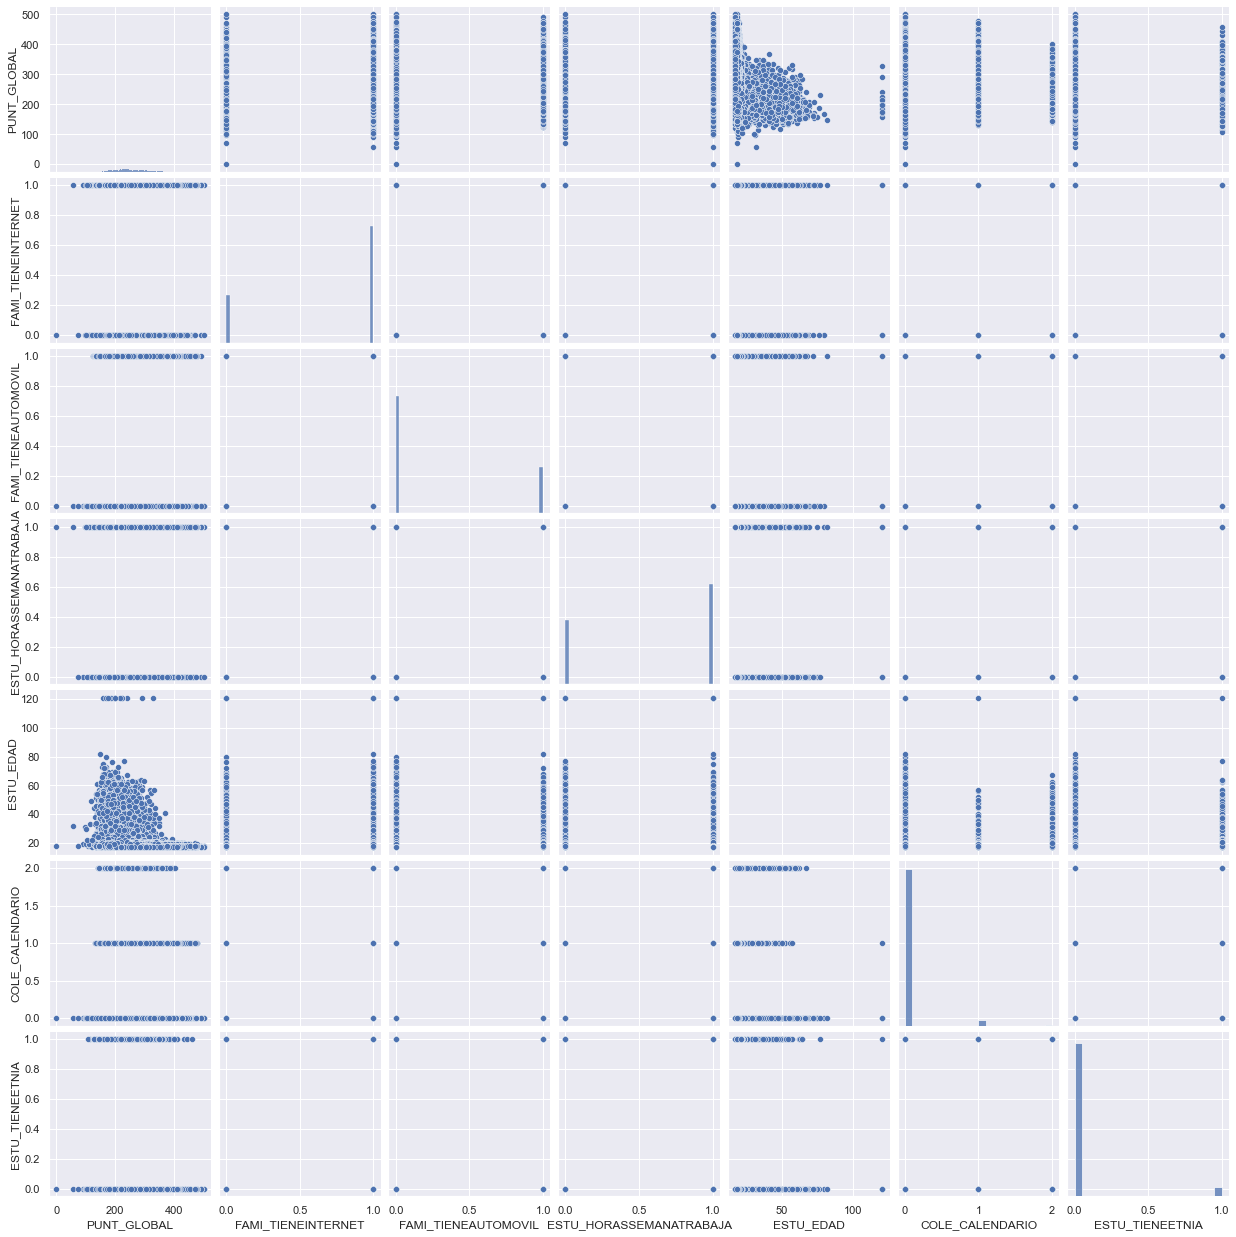

In [41]:
sns.pairplot(data_base_fact[top5corr])

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [42]:
from sklearn import linear_model

In [43]:
#Division de los datos
y = pd.Series(data_base_fact['PUNT_GLOBAL'])
X = data_base_fact.iloc[:,0:15]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test,)

In [47]:
r2 = lr.score(X_test, y_test)

In [49]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9915.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:22:00   Log-Likelihood:            -2.5628e+06
No. Observations:              493057   AIC:                         5.126e+06
Df Residuals:                  493041   BIC:                         5.126e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

De acuerdo a los resultados se tiene que el modelo de regresion no es globalmente significativo para explicar la variable de PUNT_GLOBAL. Basicamente se tienen problemas de autocorrelación y no normalidad, y se deben a que se aplicó la regresión sobre variables categoricas factorizadas. A continuación se realiza el proceso de generar variables dummies para correr nuevamente el modelo de regresión lineal 

In [52]:
data_reg = data_base.copy()

def create_dummies(df):
    for var in df:
        if df[var].dtypes == 'object':
            print(pd.getdummies(df[var],drop_first=True)

create_dummies(data_reg)

SyntaxError: invalid syntax (Temp/ipykernel_13748/1008068783.py, line 8)

In [ ]:
comparison_plot = pd.DataFrame(y_pred,y_test)
comparison_plot.reset_index(inplace = True)
comparison_plot.columns = ['PUNT_GLOBAL_pred', 'PUNT_GLOBAL_test']
comparison_plot.melt(id_vars=[], value_vars=['PUNT_GLOBAL_pred', 'PUNT_GLOBAL_test'])
comparison_plot

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [ ]:
# Código